## Welcome to your notebook.


#### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
#gis = GIS("home")
# import required modules
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import re
import ipywidgets as widgets
#from arcgis.features import FeatureLayer
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [2]:
import arcpy

ImportError: DLL load failed while importing arcgisscripting: %1 is not a valid Win32 application.

In [2]:
import requests
# use API sets from https://exchangeratesapi.io/documentation/
# Where USD is the base currency you want to use
# Make sure to remove the "s" in https to work
url = 'http://api.exchangeratesapi.io/v1/latest?access_key=6ff6a702f802b29210184460f0c47f95'

In [3]:
# Making our request
response = requests.get(url)
data = response.json()
# Your JSON object
print(data)

{'success': True, 'timestamp': 1638968644, 'base': 'EUR', 'date': '2021-12-08', 'rates': {'AED': 4.150463, 'AFN': 110.674871, 'ALL': 121.365728, 'AMD': 557.972703, 'ANG': 2.037715, 'AOA': 637.535116, 'ARS': 114.552257, 'AUD': 1.584912, 'AWG': 2.034498, 'AZN': 1.919455, 'BAM': 1.961093, 'BBD': 2.282866, 'BDT': 97.004069, 'BGN': 1.959163, 'BHD': 0.425993, 'BIF': 2253.267618, 'BMD': 1.129963, 'BND': 1.542672, 'BOB': 7.807146, 'BRL': 6.347795, 'BSD': 1.130604, 'BTC': 2.2931062e-05, 'BTN': 85.304079, 'BWP': 13.208558, 'BYN': 2.874515, 'BYR': 22147.268033, 'BZD': 2.279056, 'CAD': 1.427996, 'CDF': 2262.185097, 'CHF': 1.043284, 'CLF': 0.034393, 'CLP': 948.998812, 'CNY': 7.173118, 'COP': 4421.080583, 'CRC': 717.075488, 'CUC': 1.129963, 'CUP': 29.94401, 'CVE': 110.56075, 'CZK': 25.462591, 'DJF': 201.284875, 'DKK': 7.435889, 'DOP': 64.153475, 'DZD': 156.962723, 'EGP': 17.754538, 'ERN': 16.949791, 'ETB': 54.512256, 'EUR': 1, 'FJD': 2.410889, 'FKP': 0.842313, 'GBP': 0.856031, 'GEL': 3.497263, 'GGP'

In [4]:
currency_rates = pd.DataFrame(data)
currency_rates
currency_rates_usd_based = pd.DataFrame(data)

In [5]:
# Base files or origin country is Euros
# Find currency rate for USA dollars and convert
#Set that value for your base or Origin Country currency
currency_rates['rates']['USD']

1.129963

In [13]:
# Create a map
gis = GIS("home")
map1 = gis.map()
map1

ImportError: Could not import arcpy

In [11]:
import arcpy

ModuleNotFoundError: No module named 'arcpy'

<Item title:"World Countries" type:Feature Layer Collection owner:esri_dm>
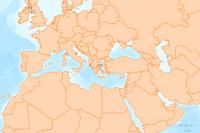

In [16]:
# Retrieve an item from ArcGIS Online from a known ID value
world_countries = gis.content.get("ac80670eb213440ea5899bbf92a04998")
world_countries

In [17]:
map.add_layer(world_countries)

In [27]:
world_countries.layers[0]

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Countries/FeatureServer/0">

In [64]:
# Obtain the first feature layer from the item
fl = world_countries.layers[0]
country_names = fl.get_unique_values(attribute = "COUNTRY")
country_codes = fl.get_unique_values(attribute = "ISO_CC")
country_names
country_codes
print(len(country_names),len(country_codes))
country_names

249 243


[' ',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Azores',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire',
 'Bosnia and Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Canarias',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Clipperton',
 'Cocos Islands',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo DRC',
 'Cook Islands',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 '

In [73]:
list_of_countries_tuple = []

for country, index in zip(country_names, range(1, len(country_names) + 1)):
    list_of_countries_tuple.append((country, index))
list_of_countries_tuple

[(' ', 1),
 ('Afghanistan', 2),
 ('Albania', 3),
 ('Algeria', 4),
 ('American Samoa', 5),
 ('Andorra', 6),
 ('Angola', 7),
 ('Anguilla', 8),
 ('Antarctica', 9),
 ('Antigua and Barbuda', 10),
 ('Argentina', 11),
 ('Armenia', 12),
 ('Aruba', 13),
 ('Australia', 14),
 ('Austria', 15),
 ('Azerbaijan', 16),
 ('Azores', 17),
 ('Bahamas', 18),
 ('Bahrain', 19),
 ('Bangladesh', 20),
 ('Barbados', 21),
 ('Belarus', 22),
 ('Belgium', 23),
 ('Belize', 24),
 ('Benin', 25),
 ('Bermuda', 26),
 ('Bhutan', 27),
 ('Bolivia', 28),
 ('Bonaire', 29),
 ('Bosnia and Herzegovina', 30),
 ('Botswana', 31),
 ('Bouvet Island', 32),
 ('Brazil', 33),
 ('British Indian Ocean Territory', 34),
 ('British Virgin Islands', 35),
 ('Brunei Darussalam', 36),
 ('Bulgaria', 37),
 ('Burkina Faso', 38),
 ('Burundi', 39),
 ('Cabo Verde', 40),
 ('Cambodia', 41),
 ('Cameroon', 42),
 ('Canada', 43),
 ('Canarias', 44),
 ('Cayman Islands', 45),
 ('Central African Republic', 46),
 ('Chad', 47),
 ('Chile', 48),
 ('China', 49),
 ('Chr

In [74]:
origin_country_selection = widgets.Dropdown(
    options=list_of_countries_tuple,
    value=2,
    description='Country:',
)
origin_country_selection

Dropdown(description='Country:', index=1, options=((' ', 1), ('Afghanistan', 2), ('Albania', 3), ('Algeria', 4…

In [75]:
origin_country_selection

Dropdown(description='Country:', index=6, options=((' ', 1), ('Afghanistan', 2), ('Albania', 3), ('Algeria', 4…

<Item title:"World Countries" type:Web Scene owner:mla200000@utdallas.edu_UTDEPPS>
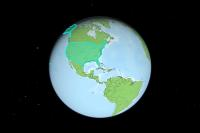

In [79]:
from arcgis.mapping import SceneLayer
#s_layer = SceneLayer(url='https://utdepps.maps.arcgis.com/home/item.html?id=294f8e98f07e487289caf9b63043b88e')
sl = gis.content.get("294f8e98f07e487289caf9b63043b88e")
sl

#type(s_layer)
#print(s_layer.properties.layers[0].name)
